![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTD_SzsBS_KmY9L_VArijNxNM2Nq4gjTgqL7EHnI74e679TvcJ5)

# CONTENT

* [1. Intoduction](#1)
* [2. Importing Packages and Collecting Data](#2)
* [3. Data Description and Preparation](#3)
* [4. Data Preprocessing](#4)
   * [4.1 Normalize Images](#4.1)
   * [4.2 Label encoding of Target varible](#4.2)
   * [4.3 Reshape](#4.3)
   * [4.4 Split training and valdiation set](#4.4)
* [5. Convolutional Neural Network](#5)
   * [5.1 Define the model](#5.1)
   * [5.2 Outline the model](#5.2)
   * [5.3 Data augmentation](#5.3)
   * [5.4 Compile and Train the model](#5.4)
   * [5.5 Evaluate the model](#5.5)
* [Prediction and Submission ]()

# 1. Intoduction <a id="1"></a>
This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on Kannada MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.

![](https://i.imgur.com/BFPJWui.jpg?1)

# 2. Importing Packages and Collecting Data <a id="2"></a>

In [1]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Importing preprocessing libraries'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
'''Importing tensorflow libraries'''
import tensorflow as tf 
print(tf.__version__)

from tensorflow.keras import layers, models

1.14.0


In [3]:
'''Read in train and test data from csv files'''
train = pd.read_csv('../input/Kannada-MNIST/train.csv')
test = pd.read_csv('../input/Kannada-MNIST/test.csv')
sample_sub = pd.read_csv("../input/Kannada-MNIST/sample_submission.csv")

# 3. Data Description and Preparation <a id="3"></a>

In [4]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train.head(3))
bold('**Preview of Test Data:**')
display(test.head(3))

**Preview of Train Data:**

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Preview of Test Data:**

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
'''Ckecking for null and missing values'''
bold('**Train Data**')
display(train.isnull().any(). describe())
bold('**Test Data**')
display(test.isnull().any(). describe())

**Train Data**

count       785
unique        1
top       False
freq        785
dtype: object

**Test Data**

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
'''Seting X and Y'''
y_train = train['label']

# Drop 'label' column
X_train = train.drop('label', axis = 1)

X_test = test.drop('id', axis = 1)

In [7]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (60000, 784)
Output vector dimension: (60000,)
Test data dimension: (5000, 784)


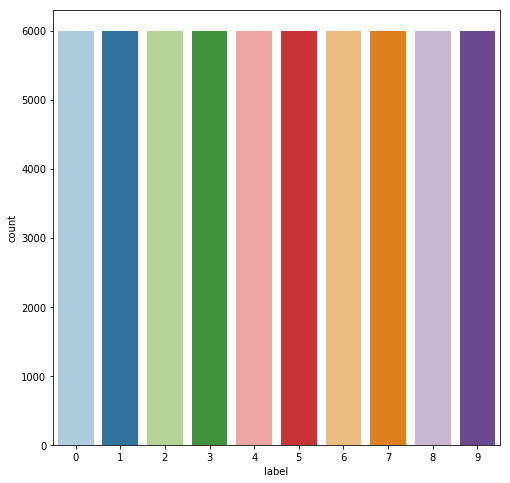

In [8]:
'''Visualizating the taget distribution'''
plt.figure(figsize = (8,8))
sns.countplot(y_train, palette='Paired')
plt.show()

**Cool!!**

In [9]:
images = train.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

image_size = images.shape[1]
print('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print('image_width => {0}\nimage_height => {1}'.format(image_width, image_height))

image_size => 784
image_width => 28
image_height => 28


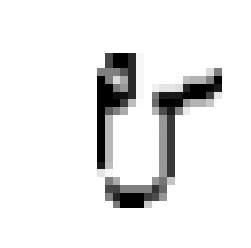

In [10]:
'''Displaying image'''
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap='binary')

# output image     
display(images[8])

**It's Eight in Kannada**

# 4. Data Preprocessing <a id="4"></a>

## 4.1 Normalize Images <a id="4.1"></a>
Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

Scaling data to the range of 0-1 is traditionally referred to as normalization.

This can be achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range.

In this case, the ratio is 1/255 or about 0.0039.

In [11]:
'''Normalizing the data'''
X_train = X_train / 255.0
X_test = X_test / 255.0

## 4.2 Label encoding of Target varible <a id="4.2"></a>


In [12]:
'''convert class labels from scalars to one-hot vectors'''
# 0 => [1 0 0 0 0 0 0 0 0 0]
# 1 => [0 1 0 0 0 0 0 0 0 0]
# ...
# 9 => [0 0 0 0 0 0 0 0 0 1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype='uint8')

## 4.3 Reshape <a id="4.3"></a>

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [13]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

## 4.4 Split training and valdiation set <a id="4.4"></a>
I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

In [14]:
'''Set the random seed'''
seed = 44
'''Split the train and the validation set for the fitting'''
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=seed)

# 5. Convolutional Neural Network <a id="5"></a>
![](https://preview.ibb.co/nRkBpp/gec2.jpg)

## 5.1 Define the model **<a id="5.1"></a>**

**What is Convolution Operation?**
* The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. 
* We have some image and feature detector(5*5)
* Feature detector does not need to be 5 by 5 matrix. It can be 3 by 3 or 7 by 7.
* Feature detector = kernel = filter
 * Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
![](https://image.ibb.co/m4FQC9/gec.jpg)
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
![](https://image.ibb.co/hWNsaU/RELU.jpg)

**MaxPool2D**
* The second important layer in CNN is the pooling (MaxPool2D) layer. 
* This layer simply acts as a downsampling filter. 
* It looks at the 2 neighboring pixels and picks the maximal value. 
* These are used to reduce computational cost, and to some extent also reduce overfitting.
![](https://preview.ibb.co/gsNYFU/maxpool.jpg)

**Dropout**
* Dropout is a technique where randomly selected neurons are ignored during training.
* Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample.
* This technique also improves generalization and reduces the overfitting.
![](https://preview.ibb.co/e7yPPp/dropout.jpg)

**Flattening**
* The Flatten layer is use to convert the final feature maps into a one single 1D vector. 
* This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers.
![](https://image.ibb.co/c7eVvU/flattenigng.jpg)

**Full Connection**
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
![](https://preview.ibb.co/evzsAU/fullyc.jpg)

## 5.2 Outline the model <a id="5.2"></a>

In [15]:
'''Set the CNN model'''
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

## 5.3 Data augmentation <a id="5.3"></a>
In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# 5.4 Compile and Train the model <a id="5.4"></a>

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 1000, epochs = 10, validation_data = (X_val, y_val), verbose = 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 91s - loss: 0.7330 - acc: 0.7488 - val_loss: 0.1146 - val_acc: 0.9645
Epoch 2/10
54000/54000 - 90s - loss: 0.1494 - acc: 0.9550 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 3/10
54000/54000 - 90s - loss: 0.0912 - acc: 0.9727 - val_loss: 0.0448 - val_acc: 0.9862
Epoch 4/10
54000/54000 - 90s - loss: 0.0700 - acc: 0.9793 - val_loss: 0.0339 - val_acc: 0.9897
Epoch 5/10
54000/54000 - 90s - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0323 - val_acc: 0.9908
Epoch 6/10
54000/54000 - 90s - loss: 0.0476 - acc: 0.9871 - val_loss: 0.0266 - val_acc: 0.9923
Epoch 7/10
54000/54000 - 90s - loss: 0.0419 - acc: 0.9874 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 8/10
54000/54000 - 90s - loss: 0.0362 - acc: 0.9895 - val_loss: 0.0238 - val_acc: 0.9923
Epoch 9/10
54000/54000 - 90s - loss: 0.0345 - acc: 0.9901 - val_loss: 0.0221 - val_acc: 0.9937
Epoch 10/10
54000/54000 - 90s - loss: 0.0305 - acc: 0.9915 - val_loss: 0.0224 - val_acc: 0.9923


## 5.5 Evaluate the model <a id="5.5"></a>

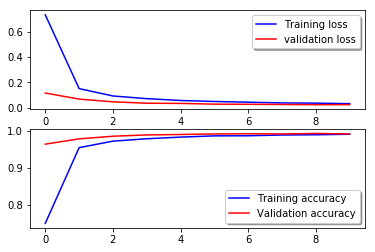

In [18]:
'''Training and validation curves'''
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

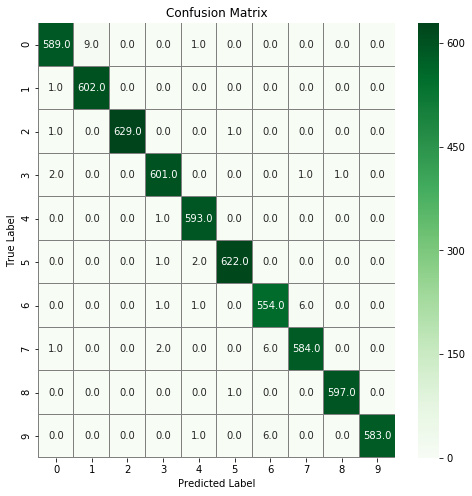

In [19]:
'''confusion matrix'''
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Prediction and Submission 

In [20]:
'''predict results'''
results = model.predict(X_test)

'''select the indix with the maximum probability'''
results = np.argmax(results,axis = 1)

In [21]:
sample_sub['label'] = results
sample_sub.to_csv('submission.csv',index=False)